Imports `pandas` library to load data, `numpy` for built-in math functions, and `matplotlib` to make scatterplots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("intrusion.csv")

In [5]:
data

,Attribute1,Attribute2,Attribute3,Intrusion
0,2.157322,1.922947,3.223735,0
1,1.711650,5.534262,1.519069,0
2,-1.062710,0.913824,0.715046,0
3,-0.100344,6.153463,2.250014,0
4,0.145073,6.553025,2.214019,0
...,...,...,...,...
10095,1.249903,5.662992,4.399133,0
10096,-1.528386,6.275631,0.829751,0
10097,1.878522,1.958191,1.517479,0
10098,1.966711,4.945319,-2.253687,0


{0, 1}

No handles with labels found to put in legend.


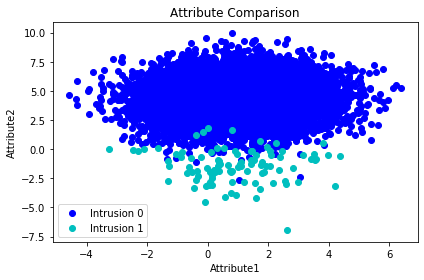

In [46]:
fig, axs = plt.subplots()
axs.set_title("Attribute Comparison")
axs.legend()
axs.scatter(data[data["Intrusion"] == 0]["Attribute1"], data[data["Intrusion"] == 0]["Attribute2"], color='b')
axs.scatter(data[data["Intrusion"] == 1]["Attribute1"], data[data["Intrusion"] == 1]["Attribute2"], color='c')
axs.set(xlabel='Attribute1', ylabel='Attribute2')
axs.legend(["Intrusion 0", "Intrusion 1"])
fig.tight_layout()

No handles with labels found to put in legend.


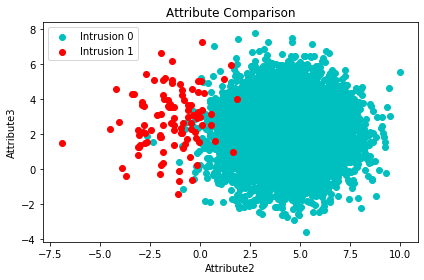

In [47]:
fig, axs = plt.subplots()
axs.set_title("Attribute Comparison")
axs.legend()
axs.scatter(data[data["Intrusion"] == 0]["Attribute2"], data[data["Intrusion"] == 0]["Attribute3"], color='c')
axs.scatter(data[data["Intrusion"] == 1]["Attribute2"], data[data["Intrusion"] == 1]["Attribute3"], color='r')
axs.set(xlabel='Attribute2', ylabel='Attribute3')
axs.legend(["Intrusion 0", "Intrusion 1"])
fig.tight_layout()